# CART (Classification And Regression Trees)

- 1984 yılında Leo Breiman tarafından yapılmıştır.
- Random Forest temelini oluşturur.
- Amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.
- Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt grupları oluşturur.
  <br>
  <img src="https://www.datasciencearth.com/wp-content/uploads/2020/03/Capture-4.png">
  <br>
  <img src = "https://i0.wp.com/miracozturk.com/wp-content/uploads/2020/12/microsoft-power-bi-data-science-python-bussiness-intelligence-classification-analyze-decision-tree-node.png?resize=1024%2C549&ssl=1">


- 1. Exploratory Data Analysis
- 2. Data Preprocessing & Feature Engineering
- 3. Modeling using CART
- 4. Hyperparameter Optimization with GridSearchCV
- 5. Final Model
- 6. Feature Importance
- 7. Analyzing Model Complexity with Learning Curves (BONUS)
- 8. Visualizing the Decision Tree
- 9. Extracting Decision Rules
- 10. Extracting Python/SQL/Excel Codes of Decision Rules
- 11. Prediction using Python Codes
- 12. Saving and Loading Model

pip install pydotplus

pip install skompiler

pip install astor

pip install joblib


In [1]:
import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from skompiler import skompile
import graphviz

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)


**1. Exploratory Data Analysis**

**2. Data Preprocessing & Feature Engineering**

**3. Modeling using CART**


In [2]:
df = pd.read_csv("datasets/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

cartModel = DecisionTreeClassifier(random_state=1).fit(X, y)

# Confusion matrix için yPred:
yPred = cartModel.predict(X)

# AUC için yProb:
yProb = cartModel.predict_proba(X)[:, 1]

# Confusion matrix
print(classification_report(y, yPred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [3]:
# AUC
roc_auc_score(y, yProb)


1.0

**Holdout Yöntemi İle Başarı Değerlendirme**


In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(
    X, y, test_size=0.30, random_state=17)
cartModel = DecisionTreeClassifier(random_state=17).fit(XTrain, yTrain)


In [5]:
# Train Hatası
yPred = cartModel.predict(XTrain)
yProb = cartModel.predict_proba(XTrain)[:, 1]
print(classification_report(yTrain, yPred))
roc_auc_score(yTrain, yProb)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



1.0

In [6]:
# Tes Hatası
yPred = cartModel.predict(XTest)
yProb = cartModel.predict_proba(XTest)[:, 1]
print(classification_report(yTest, yPred))
roc_auc_score(yTest, yProb)


              precision    recall  f1-score   support

           0       0.77      0.78      0.77       150
           1       0.58      0.57      0.58        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



0.6739506172839506

**CV ile Başarı Değerlendirme**


In [7]:
cartModel = DecisionTreeClassifier(random_state=17).fit(X, y)

cvResults = cross_validate(cartModel,
                           X, y,
                           cv=5,
                           scoring=["accuracy", "f1", "roc_auc"])

cvResults['test_accuracy'].mean()
# 0.7058568882098294


0.7058568882098294

In [8]:
cvResults['test_f1'].mean()
# 0.5710621194523633


0.5710621194523633

In [9]:
cvResults['test_roc_auc'].mean()
# 0.6719440950384347


0.6719440950384347

**4. Hyperparameter Optimization with GridSearchCV**


In [10]:
cartModel.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [11]:
cartParams = {"max_depth": range(1, 11), "min_samples_leaf": range(2, 20)}


In [12]:
cartBestGrid = GridSearchCV(cartModel, cartParams, cv=5, n_jobs=1, verbose=True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [13]:
cartBestGrid.best_params_

{'max_depth': 7, 'min_samples_leaf': 18}

In [14]:
cartBestGrid.best_score_

0.7488158899923606

In [15]:
random = X.sample(1, random_state=45)
cartBestGrid.predict(random)

array([1], dtype=int64)

**5. Final Model**

In [16]:
cartFinal = DecisionTreeClassifier(**cartBestGrid.best_params_, random_state=17).fit(X, y)
cartFinal.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 18,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [17]:
cartFinal = cartModel.set_params(**cartBestGrid.best_params_).fit(X, y)

In [18]:
cartFinal.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 18,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [19]:
cvResults = cross_validate(cartFinal,X, y, cv=5,scoring=["accuracy", "f1", "roc_auc"])
cvResults['test_accuracy'].mean()

0.7488158899923606

In [20]:
cvResults['test_f1'].mean()

0.624798861465094

In [21]:
cvResults['test_roc_auc'].mean()

0.78283857442348

**6. Feature Importance**

In [22]:
cartFinal.feature_importances_

array([0.00427304, 0.51679998, 0.06032109, 0.00145605, 0.00938085,
       0.19265404, 0.09462262, 0.12049233])

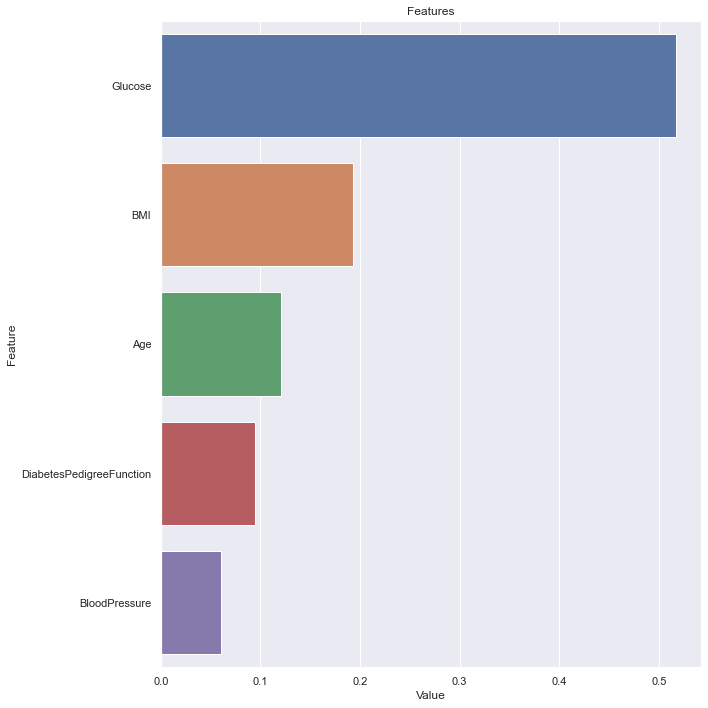

In [23]:
def plotImportance(model, features, num=len(X), save=False):
    featureImp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=featureImp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plotImportance(cartFinal, X, num=5)


**7. Analyzing Model Complexity with Learning Curves (BONUS)**

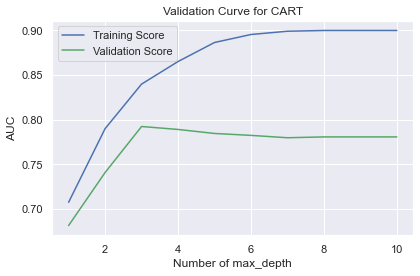

In [24]:
trainScore, testScore = validation_curve(cartFinal, X, y,
                                           param_name="max_depth",
                                           param_range=range(1, 11),
                                           scoring="roc_auc",
                                           cv=10)

meanTrainScore = np.mean(trainScore, axis=1)
meanTestScore = np.mean(testScore, axis=1)
plt.plot(range(1, 11), meanTrainScore,
         label="Training Score", color='b')

plt.plot(range(1, 11), meanTestScore,
         label="Validation Score", color='g')

plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [ ]:
def valCurveParams(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)
    
valCurveParams(cartFinal, X, y, "max_depth", range(1, 11), scoring="f1")


In [ ]:
cartValParams = [["max_depth", range(1, 11)], ["min_samples_split", range(2, 20)]]

for i in range(len(cartValParams)):
    valCurveParams(cartModel, X, y, cartValParams[i][0], cartValParams[i][1])

**8. Visualizing the Decision Tree**

In [ ]:
def tree_graph(model, col_names, file_name):
    tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)


tree_graph(model=cartFinal, col_names=X.columns, file_name="cart_final.png")

**9. Extracting Decision Rules**

In [ ]:
treeRules = export_text(cartFinal, feature_names=list(X.columns))
print(treeRules)

**10. Extracting Python Codes of Decision Rules**

In [ ]:
print(skompile(cartFinal.predict).to('python/code'))

In [ ]:
print(skompile(cartFinal.predict).to('sqlalchemy/sqlite'))

In [ ]:
print(skompile(cartFinal.predict).to('excel'))

**11. Prediction using Python Codes**

In [ ]:
def predict_with_rules(x):
    return ((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6864999830722809 else
        0) if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else ((1 if x[5
        ] <= 32.45000076293945 else 1 if x[3] <= 10.5 else 0) if x[2] <= 53.0 else
        ((0 if x[1] <= 111.5 else 0 if x[2] <= 72.0 else 1 if x[3] <= 31.0 else
        0) if x[2] <= 82.5 else 1) if x[4] <= 36.5 else 0) if x[6] <=
        0.5005000084638596 else (0 if x[1] <= 88.5 else (((0 if x[0] <= 1.0 else
        1) if x[1] <= 98.5 else 1) if x[6] <= 0.9269999861717224 else 0) if x[1
        ] <= 116.0 else 0 if x[4] <= 166.0 else 1) if x[2] <= 69.0 else ((0 if
        x[2] <= 79.0 else 0 if x[1] <= 104.5 else 1) if x[3] <= 5.5 else 0) if
        x[6] <= 1.098000019788742 else 1) if x[5] <= 45.39999961853027 else 0 if
        x[7] <= 22.5 else 1) if x[7] <= 28.5 else (1 if x[5] <=
        9.649999618530273 else 0) if x[5] <= 26.350000381469727 else (1 if x[1] <=
        28.5 else ((0 if x[0] <= 11.5 else 1 if x[5] <= 31.25 else 0) if x[1] <=
        94.5 else (1 if x[5] <= 36.19999885559082 else 0) if x[1] <= 97.5 else
        0) if x[6] <= 0.7960000038146973 else 0 if x[0] <= 3.0 else (1 if x[6] <=
        0.9614999890327454 else 0) if x[3] <= 20.0 else 1) if x[1] <= 99.5 else
        ((1 if x[5] <= 27.649999618530273 else 0 if x[0] <= 5.5 else (((1 if x[
        0] <= 7.0 else 0) if x[1] <= 103.5 else 0) if x[1] <= 118.5 else 1) if
        x[0] <= 9.0 else 0) if x[6] <= 0.19999999552965164 else ((0 if x[5] <=
        36.14999961853027 else 1) if x[1] <= 113.0 else 1) if x[0] <= 1.5 else
        (1 if x[6] <= 0.3620000034570694 else 1 if x[5] <= 30.050000190734863 else
        0) if x[2] <= 67.0 else (((0 if x[6] <= 0.2524999976158142 else 1) if x
        [1] <= 120.0 else 1 if x[6] <= 0.23899999260902405 else 1 if x[7] <=
        30.5 else 0) if x[2] <= 83.0 else 0) if x[5] <= 34.45000076293945 else
        1 if x[1] <= 101.0 else 0 if x[5] <= 43.10000038146973 else 1) if x[6] <=
        0.5609999895095825 else ((0 if x[7] <= 34.5 else 1 if x[5] <=
        33.14999961853027 else 0) if x[4] <= 120.5 else (1 if x[3] <= 47.5 else
        0) if x[4] <= 225.0 else 0) if x[0] <= 6.5 else 1) if x[1] <= 127.5 else
        (((((1 if x[1] <= 129.5 else ((1 if x[6] <= 0.5444999933242798 else 0) if
        x[2] <= 56.0 else 0) if x[2] <= 71.0 else 1) if x[2] <= 73.0 else 0) if
        x[5] <= 28.149999618530273 else (1 if x[1] <= 135.0 else 0) if x[3] <=
        21.0 else 1) if x[4] <= 132.5 else 0) if x[1] <= 145.5 else 0 if x[7] <=
        25.5 else ((0 if x[1] <= 151.0 else 1) if x[5] <= 27.09999942779541 else
        ((1 if x[0] <= 6.5 else 0) if x[6] <= 0.3974999934434891 else 0) if x[2
        ] <= 82.0 else 0) if x[7] <= 61.0 else 0) if x[5] <= 29.949999809265137
         else ((1 if x[2] <= 61.0 else (((((0 if x[6] <= 0.18299999833106995 else
        1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else 0) if x[2] <=
        73.0 else 0) if x[0] <= 4.5 else 1 if x[6] <= 0.6169999837875366 else 0
        ) if x[6] <= 1.1414999961853027 else 1) if x[5] <= 41.79999923706055 else
        1 if x[6] <= 0.37299999594688416 else 1 if x[1] <= 142.5 else 0) if x[7
        ] <= 30.5 else (((1 if x[6] <= 0.13649999350309372 else 0 if x[5] <=
        32.45000076293945 else 1 if x[5] <= 33.05000114440918 else (0 if x[6] <=
        0.25599999725818634 else (0 if x[1] <= 130.5 else 1) if x[0] <= 8.5 else
        0) if x[0] <= 13.5 else 1) if x[2] <= 92.0 else 1) if x[5] <=
        45.54999923706055 else 1) if x[6] <= 0.4294999986886978 else (1 if x[5] <=
        40.05000114440918 else 0 if x[5] <= 40.89999961853027 else 1) if x[4] <=
        333.5 else 1 if x[2] <= 64.0 else 0) if x[1] <= 157.5 else ((((1 if x[7
        ] <= 25.5 else 0 if x[4] <= 87.5 else 1 if x[5] <= 45.60000038146973 else
        0) if x[7] <= 37.5 else 1 if x[7] <= 56.5 else 0 if x[6] <=
        0.22100000083446503 else 1) if x[6] <= 0.28849999606609344 else 0) if x
        [6] <= 0.3004999905824661 else 1 if x[7] <= 44.0 else (0 if x[7] <=
        51.0 else 1 if x[6] <= 1.1565000414848328 else 0) if x[0] <= 6.5 else 1
        ) if x[4] <= 629.5 else 1 if x[6] <= 0.4124999940395355 else 0)

X.columns

In [ ]:
x = [12, 13, 20, 23, 4, 55, 12, 7]

predict_with_rules(x)


In [ ]:
x = [6, 148, 70, 35, 0, 30, 0.62, 50]

predict_with_rules(x)

**12. Saving and Loading Model**

In [ ]:
joblib.dump(cartFinal, "cart_final.pkl")

cart_model_from_disc = joblib.load("cart_final.pkl")

x = [12, 13, 20, 23, 4, 55, 12, 7]

cart_model_from_disc.predict(pd.DataFrame(x).T)
